# Multiple Linear Regression

## Bike Sharing Assignment

### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

#### The Solution is divided into the following sections:

-  Reading and Understanding the Data
-  Data Manipulation and Visualisation
-  Data Preparation
-  Model building and evaluation

# Step 1 Reading and Understanding the data

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodel for model building 
import statsmodels.api as sm 

# Importing statsmodel to calculate "VIF"
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data

bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking number of rows in dataset
bike_sharing.shape

(730, 16)

In [4]:
#check dataframe for null and datatype 
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking Numerical Columns Details
bike_sharing.describe()    

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data Preparation and Cleaning

In [6]:
# Dropping column 'instant' as it is the index column
bike_sharing.drop(['instant'], axis = 1, inplace=True)
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Dropping column 'dteday'as we already have columns 'yr' & 'mnth' representing this parameter. 

bike_sharing.drop(['dteday'], axis = 1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Dropping column 'casual' & 'registered' as we know that casual+registered=cnt and cnt is our target variable

bike_sharing.drop(['casual','registered'], axis = 1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#check for datatypes
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
# Cheking Null Values

bike_sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- There are no null values

In [11]:
# Features like season, mnth, weekday, weathersit all are categorical variable, but currently they are integers and their 
# data type is int64. Hence, we will replace them with categorical varibles

bike_sharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_sharing.weathersit.replace({1:'clear',2:'cloudy',3:'light snow + rain',4:'heavy snow + rain'},inplace = True)

bike_sharing.mnth = bike_sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_sharing.weekday = bike_sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Checking for Outliers

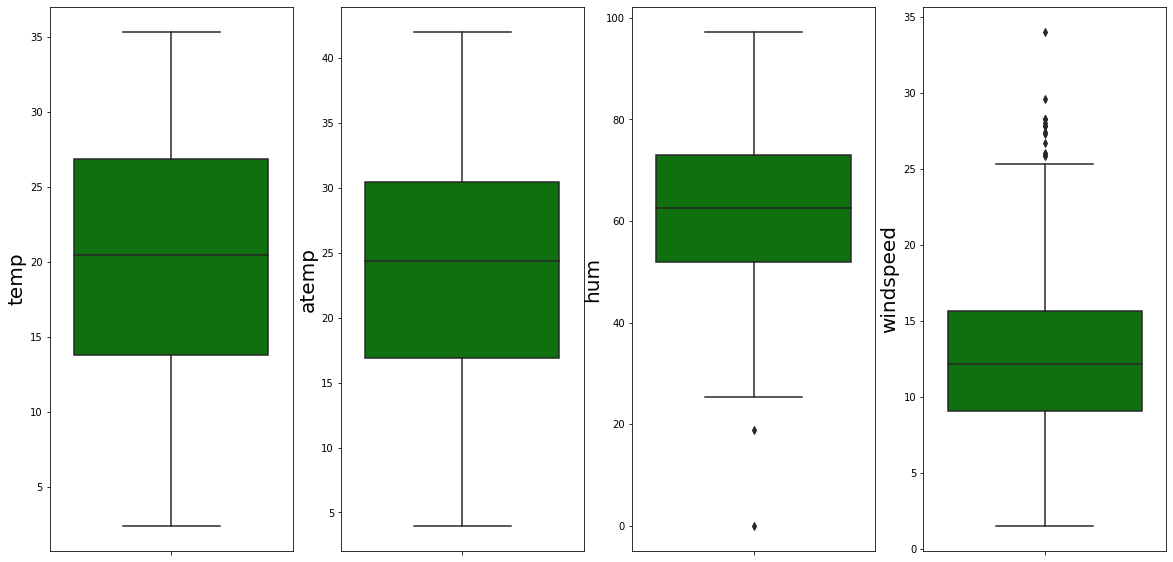

In [12]:
# Draw box plots for indepent variables with continuous values
numcol = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,10))

i = 1
for col in numcol:
    plt.subplot(1,4,i)
    p = sns.boxplot(y=col, data=bike_sharing,color ='green')
    p.set_ylabel(col,fontsize=20)
    i+=1

### Outlier Analsysis:
- Windspeed and Humidty show some presence of outliers.
- As these values are close to Maximum, removing them is not required.

### Visualizing Numeric Variables

# Step 3: EDA and Visualization

### Univariate, bivariate and multivariate Analysis 

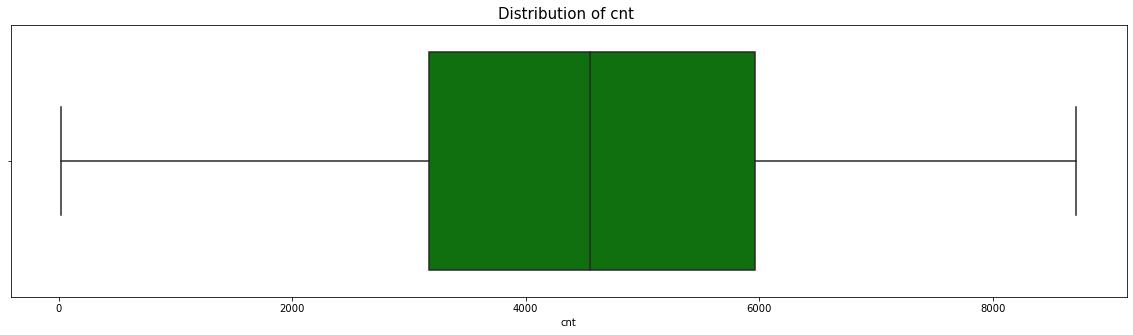

In [13]:
# Distribution of cnt
plt.figure(figsize=(20,5))
plt.title("Distribution of cnt ",fontsize = 15)
sns.boxplot(bike_sharing.cnt,color ='green')
plt.show()

- cnt is mostly concentrated between 3000 to 6000 value and mean values lies near 4500

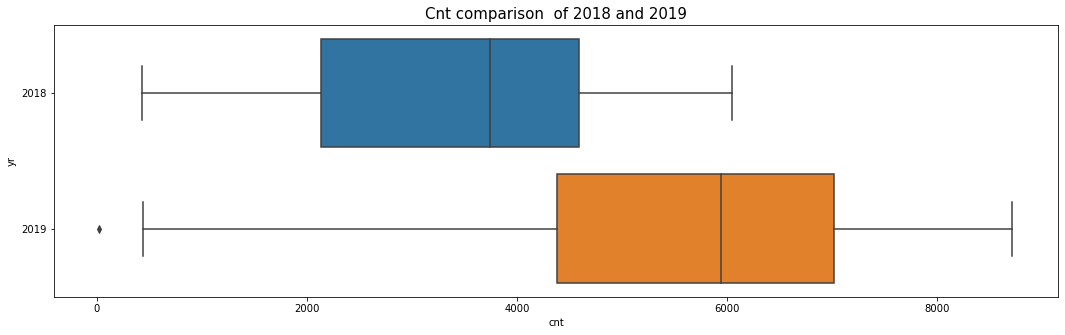

In [14]:
# Cnt comparison  of 2018 and 2019
plt.figure(figsize=(18,5))
plt.title("Cnt comparison  of 2018 and 2019",fontsize=15)
sns.boxplot(data=bike_sharing,x="cnt",y="yr",orient='h')
plt.yticks([1,0],['2019','2018'])
plt.show()

- The demand of bikes in the year 2019 has grown comparing by last year demand. In 2018 it was in the range of 2000 to 4500 and in 2019 it was in the range of 4500 to 7000 

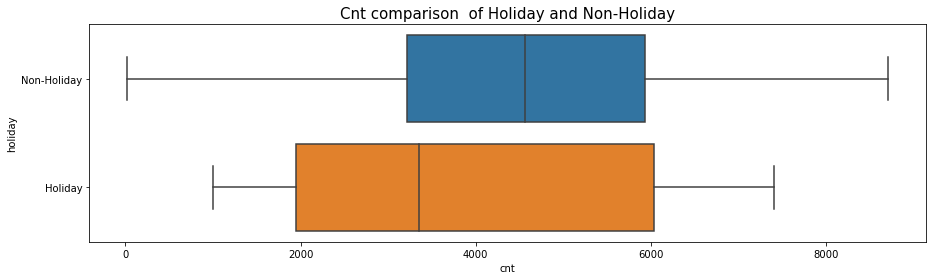

In [15]:
# Cnt comparison  of Holiday and Non-Holiday
plt.figure(figsize=(15,4))
plt.title("Cnt comparison  of Holiday and Non-Holiday",fontsize=15)
sns.boxplot(data=bike_sharing,x="cnt",y="holiday",orient='h')
plt.yticks([1,0],['Holiday','Non-Holiday'])
plt.show()

- Demand is high and more concentrated during Non Holidays which is around 3500 to 6000 and during holiday these values lies between between 2000 to 6000

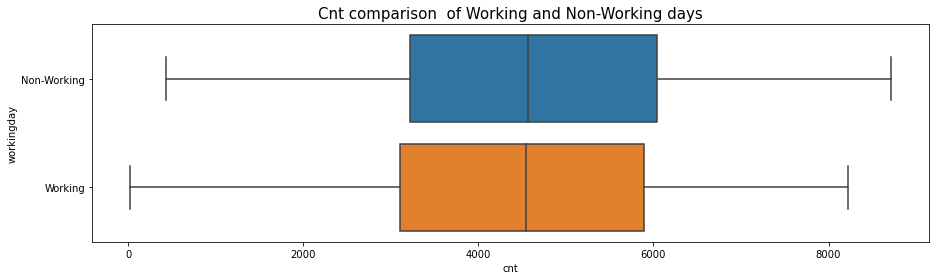

In [16]:
# Cnt comparison  of Working and Non-Working days
plt.figure(figsize=(15,4))
plt.title("Cnt comparison  of Working and Non-Working days",fontsize=15)
sns.boxplot(data=bike_sharing,x="cnt",y="workingday",orient='h')
plt.yticks([1,0],['Working','Non-Working'])
plt.show()

- Demand during no-working days are little high but the difference is not much

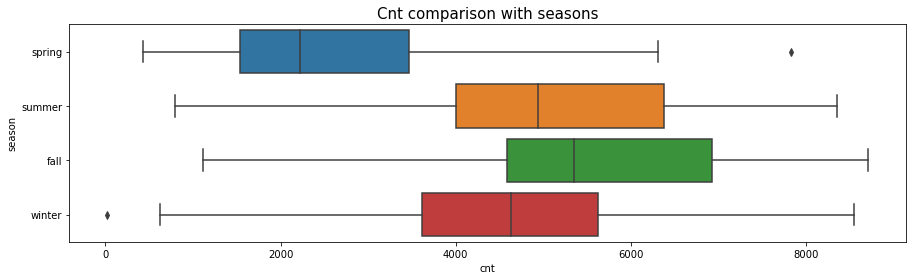

In [17]:
# Cnt comparison with seasons
plt.figure(figsize=(15,4))
plt.title("Cnt comparison with seasons",fontsize=15)
sns.boxplot(data=bike_sharing,x="cnt",y="season",orient='h')
plt.show()

- During fall the demand is highest and during spring it is lowest

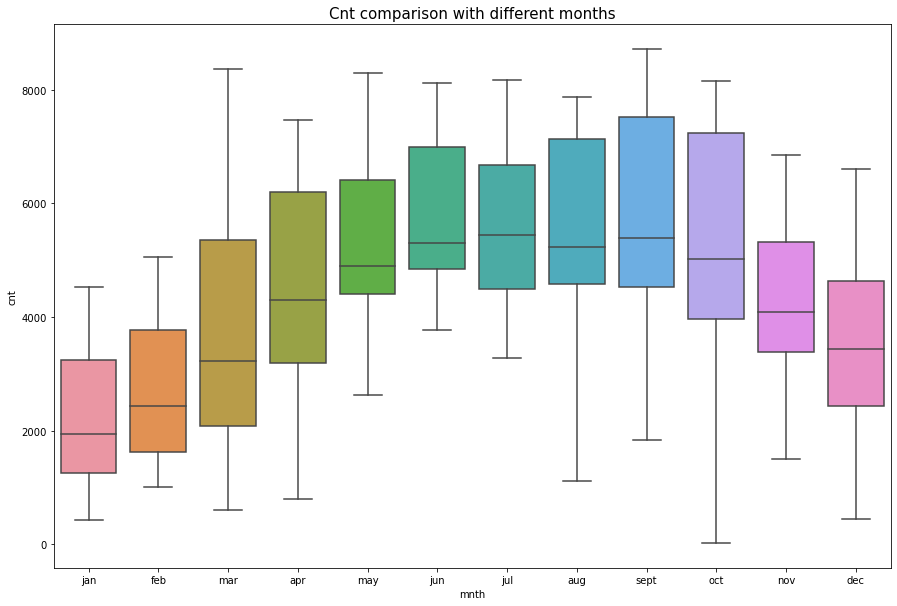

In [18]:
# cnt comparison with different months
plt.figure(figsize=(15,10))
plt.title("Cnt comparison with different months",fontsize=15)
sns.boxplot(data=bike_sharing,y="cnt",x="mnth",orient='v')
plt.show()

- Demand at the start of the year i.e. January is low and it rises at reaches highest during the month of september and then again dips

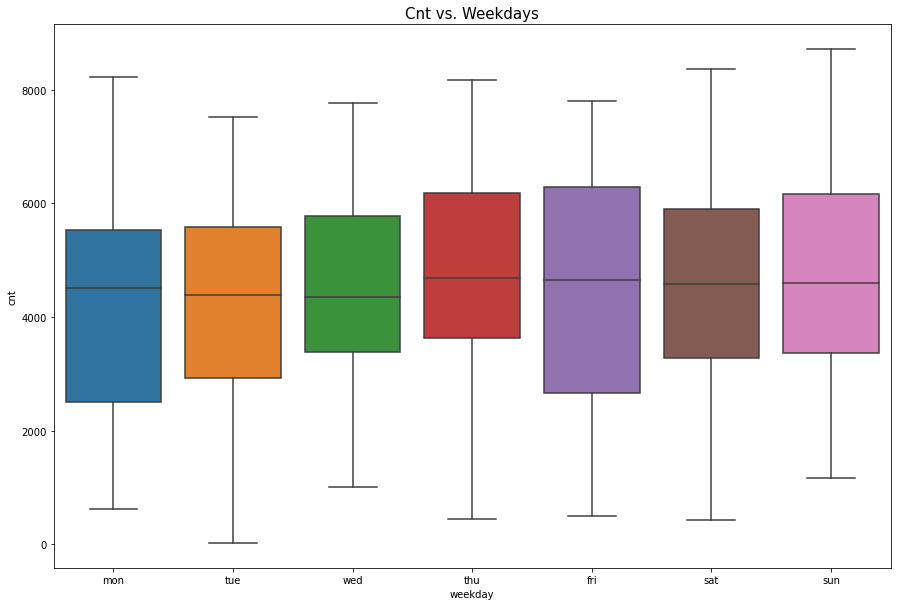

In [19]:
# cnt vs weekdays
plt.figure(figsize=(15,10))
plt.title("Cnt vs. Weekdays",fontsize=15)
sns.boxplot(data=bike_sharing,y="cnt",x="weekday",orient='v')
plt.show()

- We can see demands are high during weekends but it not very conclusive as other days demands are also close enough

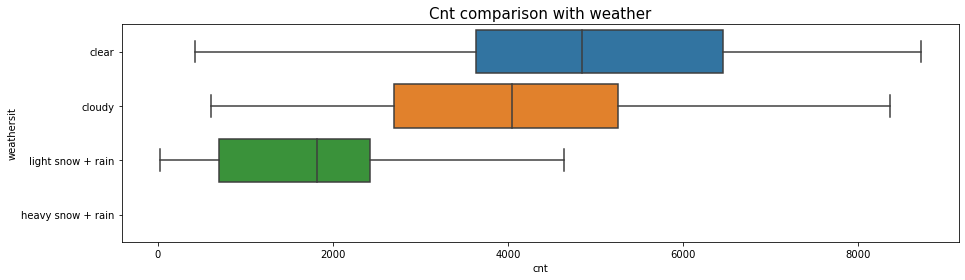

In [20]:
# Cnt comparison with weather
plt.figure(figsize=(15,4))
plt.title("Cnt comparison with weather",fontsize=15)
sns.boxplot(data=bike_sharing,x="cnt",y="weathersit",orient='h',order=["clear","cloudy","light snow + rain","heavy snow + rain"])
plt.show()

- we can clearly see demand of the bikes very much depends on the weather conditions. When weather is 'light snow + rain' demand dips.

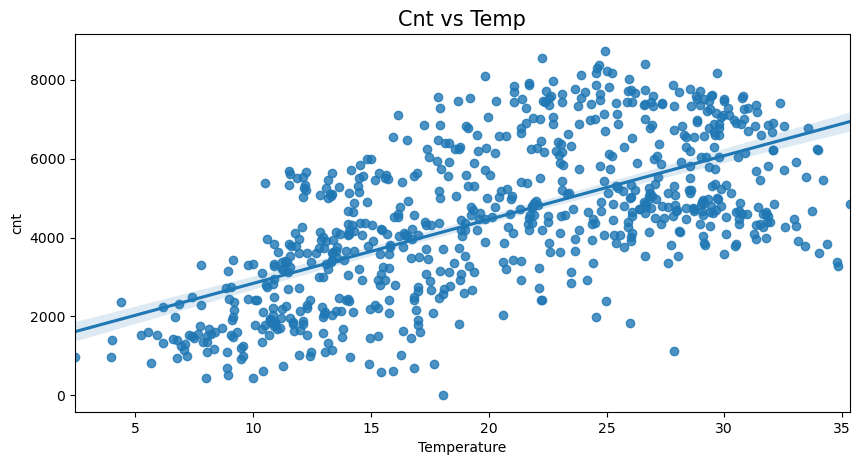

In [21]:
# cnt vs Temp
plt.figure(figsize=(10,5), dpi = 100)
plt.title("Cnt vs Temp",fontsize=15)
sns.regplot(data=bike_sharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

- cnt increases linearly with temp indicating linear relation.
- Demand for bikes is positively correlated with temp

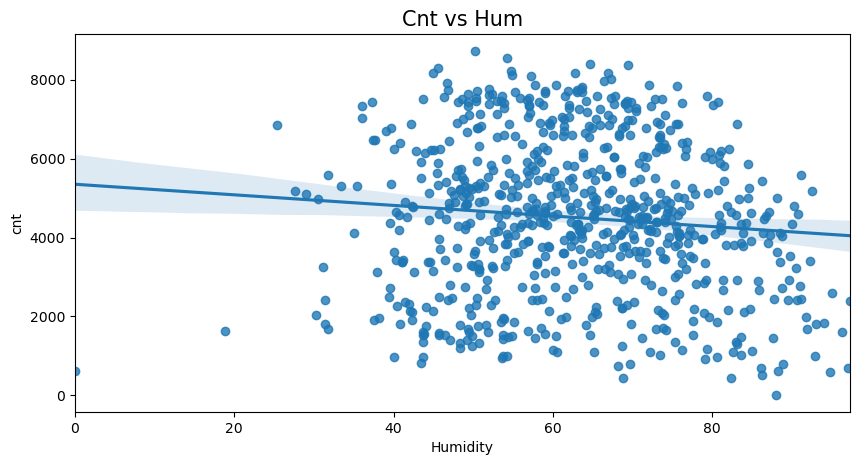

In [22]:
#  cnt vs Hum
plt.figure(figsize=(10,5), dpi = 100)
plt.title("Cnt vs Hum",fontsize=15)
sns.regplot(data=bike_sharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

- Hum values are very much scattered when compared with cnt value. Hence nothing much can be stated but decreasing pattern can be seen

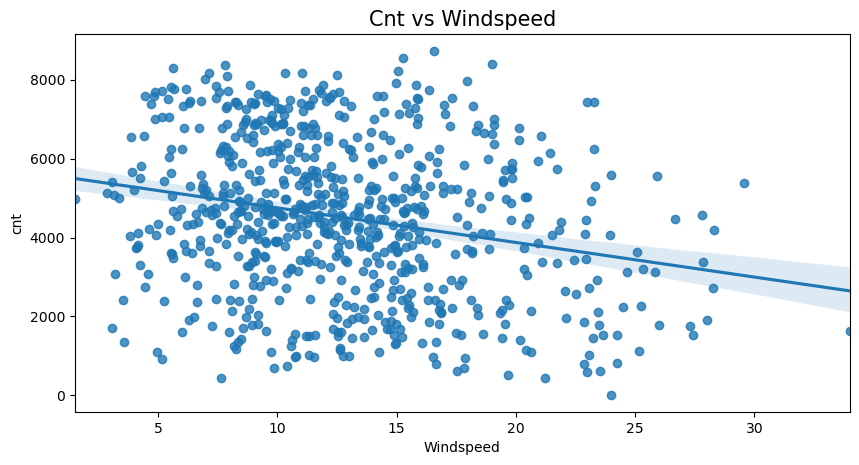

In [23]:
# Cnt vs Windspeed
plt.figure(figsize=(10,5), dpi = 100)
plt.title("Cnt vs Windspeed",fontsize=15)
sns.regplot(data=bike_sharing,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

- windspeed values are very much scattered when compared with cnt value. Hence nothing much can be stated but decreasing pattern can be seen

<Figure size 1080x2160 with 0 Axes>

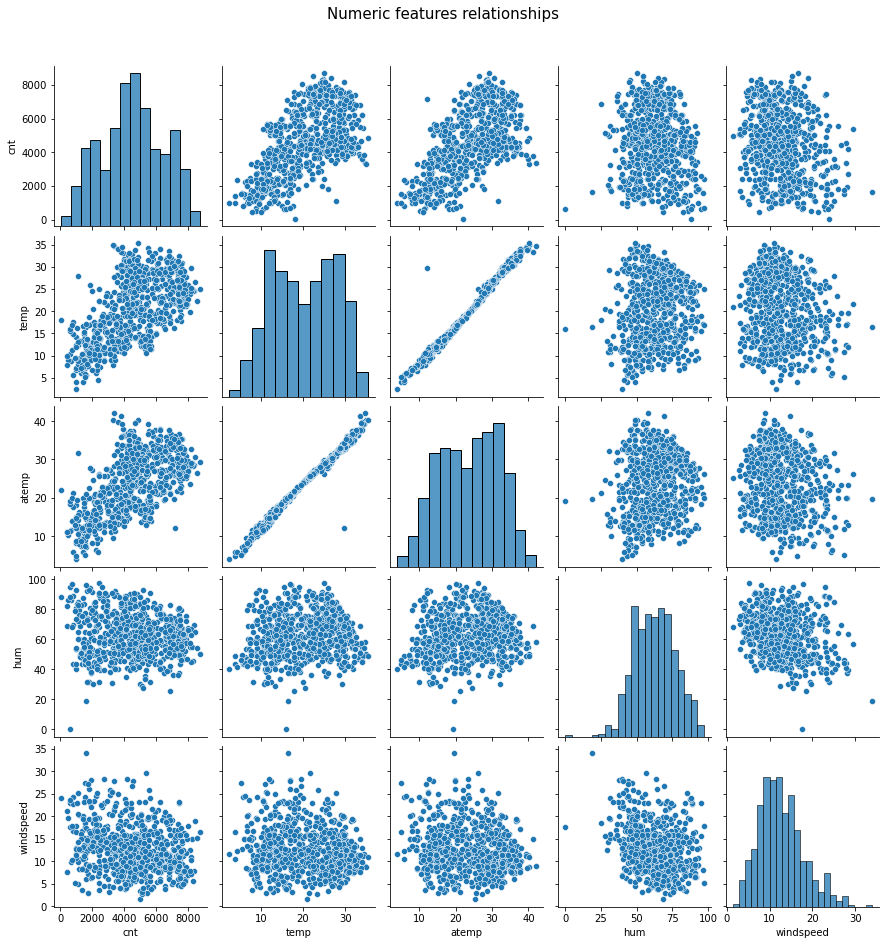

In [24]:
#Drawing pairplots for continuous numeric variables
plt.figure(figsize = (15,30))
figure = sns.pairplot(data=bike_sharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
figure.fig.suptitle("Numeric features relationships",fontsize=15, y=1.05) 
plt.show()

- temp and atemp has high co-relation with the target variable cnt
- temp and atemp are highly co-related with each other

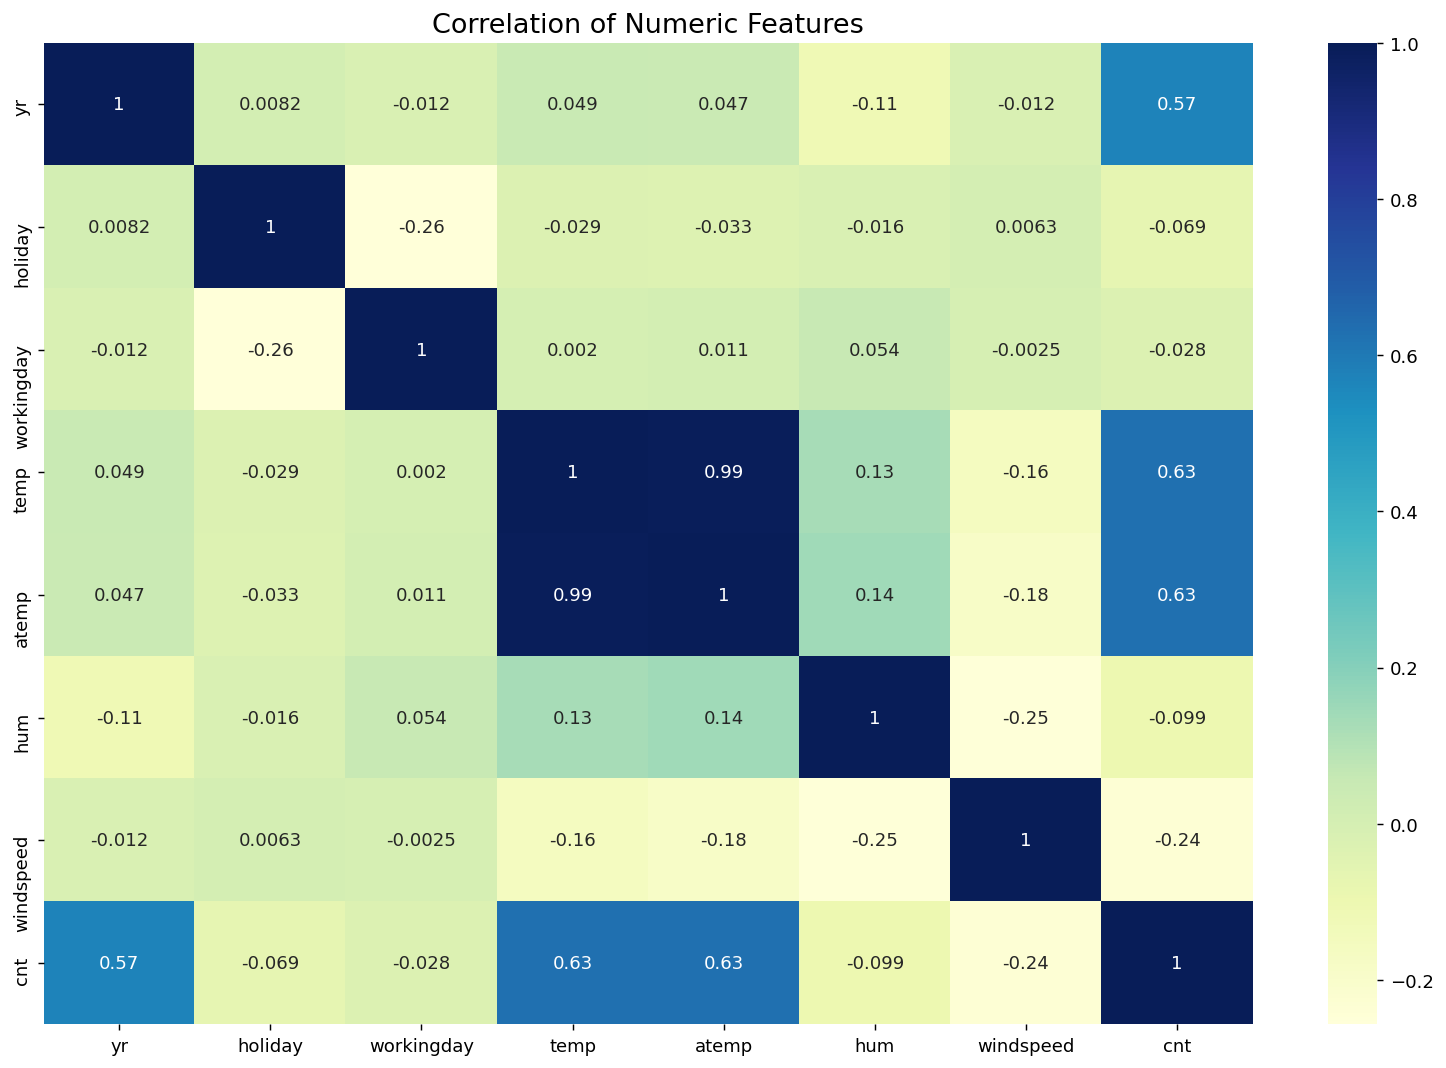

In [25]:
# Checking continuous variables relationship with each other

plt.figure(figsize=(15,10),dpi=130)
plt.title("Correlation of Numeric Features",fontsize=15)
sns.heatmap(bike_sharing.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [26]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp(atemp is feeling temperature and it will be more valuable varible for the anlysis then temp)

bike_sharing.drop(['temp'],axis=1,inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,11.46350,43.6957,12.522300,1600


# Step 4: Modelling Data Preparation

In [27]:
#check for datatypes
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### 4.1 : Creating Dummy Variables 

In [28]:
# Creating dummy vriables and droping the first column of dummy data

season = pd.get_dummies(bike_sharing['season'], drop_first = True)
mnth= pd.get_dummies(bike_sharing['mnth'], drop_first = True)
weekday= pd.get_dummies(bike_sharing['weekday'], drop_first = True)
weathersit= pd.get_dummies(bike_sharing['weathersit'], drop_first = True)


In [29]:
# Adding the results to the original dataframe
bike_sharing = pd.concat([bike_sharing, season,weekday,mnth,weathersit], axis = 1)

In [30]:
bike_sharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,jan,jul,jun,mar,may,nov,oct,sept,cloudy,light snow + rain
0,spring,0,jan,0,mon,1,cloudy,18.18125,80.5833,10.749882,...,1,0,0,0,0,0,0,0,1,0
1,spring,0,jan,0,tue,1,cloudy,17.68695,69.6087,16.652113,...,1,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,wed,1,clear,9.47025,43.7273,16.636703,...,1,0,0,0,0,0,0,0,0,0
3,spring,0,jan,0,thu,1,clear,10.60610,59.0435,10.739832,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,jan,0,fri,1,clear,11.46350,43.6957,12.522300,...,1,0,0,0,0,0,0,0,0,0
5,spring,0,jan,0,sat,0,clear,11.66045,51.8261,6.000868,...,1,0,0,0,0,0,0,0,0,0
6,spring,0,jan,0,sun,0,cloudy,10.44195,49.8696,11.304642,...,1,0,0,0,0,0,0,0,1,0
7,spring,0,jan,0,mon,1,cloudy,8.11270,53.5833,17.875868,...,1,0,0,0,0,0,0,0,1,0
8,spring,0,jan,0,tue,1,clear,5.80875,43.4167,24.250650,...,1,0,0,0,0,0,0,0,0,0
9,spring,0,jan,0,wed,1,clear,7.54440,48.2917,14.958889,...,1,0,0,0,0,0,0,0,0,0


In [31]:
# Drop original column as we have created the dummies for it
bike_sharing.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sept,cloudy,light snow + rain
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
#Print columns after creating dummies
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

### 4.2 : Splitting the data into Train and Test Set

In [33]:
df_train, df_test = train_test_split(bike_sharing, train_size = 0.71, test_size = 0.29, random_state = 50)
# we are using 80:20 ratio for train and test split because when we are using split in 70:30 ratio 
# 1 row wasn't been adjusted neither in train data nor test data. 

In [34]:
bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sept,cloudy,light snow + rain
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
print(df_train.shape)
print(df_test.shape)

(518, 29)
(212, 29)


In [36]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

### 4.3: Scaling the Numerical Data

In [37]:
# Apply scaling using MinMaxScaler()
scaler = MinMaxScaler()

# Create list of Numeric Variables
num_vars=['atemp','hum','windspeed','cnt']

# Fit on Data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sept,cloudy,light snow + rain
183,0,0,1,0.823608,0.703306,0.397036,0.532329,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0.383745,0.717307,0.439630,0.089623,1,0,0,...,1,0,0,0,0,0,0,0,1,0
168,0,0,1,0.789210,0.690855,0.160161,0.586401,0,1,0,...,0,0,1,0,0,0,0,0,0,0
574,1,0,1,0.822711,0.642765,0.270511,0.756443,0,0,0,...,0,1,0,0,0,0,0,0,0,0
535,1,0,1,0.896817,0.610133,0.148050,0.712034,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
df_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,518.000000,518.000000,518.000000,518.000000
mean,0.546666,0.645052,0.317348,0.509881
std,0.223433,0.148816,0.166875,0.223466
min,0.000000,0.000000,0.000000,0.000000
25%,0.345962,0.526406,0.197838,0.350523
50%,0.559404,0.650494,0.294754,0.518638
75%,0.734080,0.751824,0.406471,0.672141
max,1.000000,1.000000,1.000000,1.000000


- We can see that max values of all variables are now 1 and min values are 0

### 4.4: Dividing Data into X and y

In [39]:
# Creating X and y
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,mon,...,jan,jul,jun,mar,may,nov,oct,sept,cloudy,light snow + rain
183,0,0,1,0.823608,0.703306,0.397036,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0.383745,0.717307,0.439630,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
168,0,0,1,0.789210,0.690855,0.160161,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
574,1,0,1,0.822711,0.642765,0.270511,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
535,1,0,1,0.896817,0.610133,0.148050,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
y_train.head()

183    0.532329
1      0.089623
168    0.586401
574    0.756443
535    0.712034
Name: cnt, dtype: float64

# Step 5: Data Modelling and Evaluation

### 5.1 : RFE (Recursive Feature Elimination)

In [42]:
# Using Mixed Modelling Approach, we start with RFE for Feature Selection to choose 15 Variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 6),
 ('wed', False, 10),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', False, 2),
 ('jul', False, 14),
 ('jun', False, 5),
 ('mar', False, 13),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sept', True, 1),
 ('cloudy', True, 1),
 ('light snow + rain', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'sat', 'sun', 'dec', 'nov', 'sept', 'cloudy',
       'light snow + rain'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['summer', 'mon', 'thu', 'tue', 'wed', 'aug', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'oct'],
      dtype='object')

We can see that following 15 features are selcted from RFE :
- yr
- holiday
- workingday
- atemp
- hum
- windspeed
- spring
- winter
- sat
- dec
- nov
- sept
- cloudy
- light snow + rain


### 5.1: Building model using statsmodel, for the detailed statistics

### Model 1:

In [67]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [68]:
# Adding a constant variable  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [69]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [71]:
# The summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.05e-191
Time:                        20:16:02   Log-Likelihood:                 523.73
No. Observations:                 518   AIC:                            -1015.
Df Residuals:                     502   BIC:                            -947.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4665      0.079      5.921      0.000       0.312       0.621
yr                    0.2326      0.008     29.151      0.000       0.217       0.248
holiday              -0.1289      0.065     -1.973      0.049      -0.257      -0.001
workingday           -0.0899      0.071     -1.258      0.209      -0.230       0.051
atemp                 0.4285      0.031     13.988      0.000       0.368       0.489
hum                  -0.1984      0.038     -5.284      0.000      -0.272      -0.125
windspeed            -0.1587      0.025     -6.227      0.000      -0.209      -0.109
spring               -0.1294      0.015     -8.577      0.000      -0.159      -0.100
winter                0.0786      0.014      5.622      0.000       0.051       0.106
sat                  -0.0687      0.071     -0.964      0.335      -0.209       0.071
sun                  -0.0615      0.071     -0.862      0.389      -0.201       0.079
dec                  -0.0523      0.016     -3.239      0.001      -0.084      -0.021
nov                  -0.0611      0.018     -3.317      0.001      -0.097      -0.025
sept                  0.0531      0.017      3.163      0.002       0.020       0.086
cloudy               -0.0439      0.011     -4.114      0.000      -0.065      -0.023
light snow + rain    -0.2042      0.026     -7.877      0.000      -0.255      -0.153
==============================================================================
Omnibus:                       83.275   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.197
Skew:                          -0.765   Prob(JB):                     9.40e-54
Kurtosis:                       5.996   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,37.16
2,workingday,36.62
3,atemp,20.00
8,sat,8.12
9,sun,7.19
5,windspeed,5.23
6,spring,3.40
7,winter,3.15
13,cloudy,2.52
0,yr,1.96


- "sat" is insignificant in presence of other variables; can be dropped as it has high p-vlue and high VIF 

In [73]:
X_train_rfe = X_train_rfe.drop(["sat"], axis = 1)

### Rebuilding the model without "sat"

### Model 2 :

In [74]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit() 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.17e-192
Time:                        20:20:34   Log-Likelihood:                 523.25
No. Observations:                 518   AIC:                            -1016.
Df Residuals:                     503   BIC:                            -952.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3973      0.032     12.291      0.000       0.334       0.461
yr                    0.2332      0.008     29.290      0.000       0.218       0.249
holiday              -0.0719      0.028     -2.584      0.010      -0.127      -0.017
workingday           -0.0219      0.011     -1.926      0.055      -0.044       0.000
atemp                 0.4292      0.031     14.014      0.000       0.369       0.489
hum                  -0.1971      0.038     -5.253      0.000      -0.271      -0.123
windspeed            -0.1591      0.025     -6.244      0.000      -0.209      -0.109
spring               -0.1289      0.015     -8.550      0.000      -0.158      -0.099
winter                0.0783      0.014      5.605      0.000       0.051       0.106
sun                   0.0057      0.015      0.385      0.701      -0.024       0.035
dec                  -0.0520      0.016     -3.222      0.001      -0.084      -0.020
nov                  -0.0631      0.018     -3.447      0.001      -0.099      -0.027
sept                  0.0536      0.017      3.195      0.001       0.021       0.087
cloudy               -0.0439      0.011     -4.116      0.000      -0.065      -0.023
light snow + rain    -0.2041      0.026     -7.874      0.000      -0.255      -0.153
==============================================================================
Omnibus:                       84.312   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.487
Skew:                          -0.777   Prob(JB):                     4.93e-54
Kurtosis:                       5.993   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'sun', 'dec', 'nov', 'sept', 'cloudy',
       'light snow + rain'],
      dtype='object')

#### Checking VIF

In [76]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.93
3,atemp,15.25
2,workingday,5.44
5,windspeed,4.16
7,winter,2.99
6,spring,2.67
12,cloudy,2.42
0,yr,1.94
10,nov,1.85
8,sun,1.77


"sun" is insignificant in presence of other variables; can be dropped as it has high p-vlue

In [77]:
X_train_rfe = X_train_rfe.drop(["sun"], axis = 1)

In [78]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'nov', 'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

### Rebuilding the model without "sun"

### Model 3: 

In [84]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit() 
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.54e-194
Time:                        20:32:01   Log-Likelihood:                 523.17
No. Observations:                 518   AIC:                            -1018.
Df Residuals:                     504   BIC:                            -958.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4003      0.031     12.792      0.000       0.339       0.462
yr                    0.2331      0.008     29.312      0.000       0.217       0.249
holiday              -0.0741      0.027     -2.728      0.007      -0.128      -0.021
workingday           -0.0245      0.009     -2.747      0.006      -0.042      -0.007
atemp                 0.4288      0.031     14.022      0.000       0.369       0.489
hum                  -0.1972      0.037     -5.262      0.000      -0.271      -0.124
windspeed            -0.1590      0.025     -6.245      0.000      -0.209      -0.109
spring               -0.1290      0.015     -8.572      0.000      -0.159      -0.099
winter                0.0783      0.014      5.606      0.000       0.051       0.106
dec                  -0.0521      0.016     -3.234      0.001      -0.084      -0.020
nov                  -0.0630      0.018     -3.448      0.001      -0.099      -0.027
sept                  0.0539      0.017      3.216      0.001       0.021       0.087
cloudy               -0.0439      0.011     -4.114      0.000      -0.065      -0.023
light snow + rain    -0.2045      0.026     -7.897      0.000      -0.255      -0.154
==============================================================================
Omnibus:                       84.200   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.074
Skew:                          -0.775   Prob(JB):                     3.68e-54
Kurtosis:                       6.000   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
X_train_rfe2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'dec', 'nov', 'sept', 'cloudy',
       'light snow + rain'],
      dtype='object')

#### checking VIF

In [86]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.22
3,atemp,15.06
5,windspeed,4.07
2,workingday,3.56
7,winter,2.98
6,spring,2.64
11,cloudy,2.41
0,yr,1.94
9,nov,1.85
8,dec,1.52


"hum" is having more VIF value (>5%) so it can me droped

In [87]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [88]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'windspeed', 'spring', 'winter',
       'dec', 'nov', 'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

### Rebuilding the model without "hum"

### Model 4: 

In [89]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit() 
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.86e-189
Time:                        20:35:18   Log-Likelihood:                 509.32
No. Observations:                 518   AIC:                            -992.6
Df Residuals:                     505   BIC:                            -937.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3038      0.026     11.678      0.000       0.253       0.355
yr                    0.2378      0.008     29.320      0.000       0.222       0.254
holiday              -0.0761      0.028     -2.728      0.007      -0.131      -0.021
workingday           -0.0293      0.009     -3.213      0.001      -0.047      -0.011
atemp                 0.3890      0.030     12.795      0.000       0.329       0.449
windspeed            -0.1220      0.025     -4.858      0.000      -0.171      -0.073
spring               -0.1359      0.015     -8.835      0.000      -0.166      -0.106
winter                0.0671      0.014      4.737      0.000       0.039       0.095
dec                  -0.0569      0.017     -3.445      0.001      -0.089      -0.024
nov                  -0.0667      0.019     -3.560      0.000      -0.104      -0.030
sept                  0.0417      0.017      2.452      0.015       0.008       0.075
cloudy               -0.0778      0.009     -8.934      0.000      -0.095      -0.061
light snow + rain    -0.2641      0.024    -11.055      0.000      -0.311      -0.217
==============================================================================
Omnibus:                       89.470   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.520
Skew:                          -0.836   Prob(JB):                     2.42e-55
Kurtosis:                       5.977   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
X_train_rfe3.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'windspeed', 'spring',
       'winter', 'dec', 'nov', 'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

#### checking vif

In [91]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,4.88
4,windspeed,4.06
2,workingday,3.36
6,winter,2.56
0,yr,1.94
8,nov,1.81
5,spring,1.80
10,cloudy,1.54
7,dec,1.46
9,sept,1.14


- Dropping "workingday" as it does not affect demand "cnt" much

In [92]:
X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)

In [93]:
X_train_rfe.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'nov',
       'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

### Rebuilding the model without "workingday"

### Model 5: 

In [94]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit() 
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.05e-188
Time:                        20:42:29   Log-Likelihood:                 504.08
No. Observations:                 518   AIC:                            -984.2
Df Residuals:                     506   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2820      0.025     11.126      0.000       0.232       0.332
yr                    0.2375      0.008     29.026      0.000       0.221       0.254
holiday              -0.0554      0.027     -2.024      0.043      -0.109      -0.002
atemp                 0.3886      0.031     12.666      0.000       0.328       0.449
windspeed            -0.1221      0.025     -4.817      0.000      -0.172      -0.072
spring               -0.1350      0.016     -8.694      0.000      -0.165      -0.104
winter                0.0664      0.014      4.647      0.000       0.038       0.094
dec                  -0.0546      0.017     -3.282      0.001      -0.087      -0.022
nov                  -0.0658      0.019     -3.478      0.001      -0.103      -0.029
sept                  0.0453      0.017      2.642      0.008       0.012       0.079
cloudy               -0.0763      0.009     -8.696      0.000      -0.094      -0.059
light snow + rain    -0.2646      0.024    -10.975      0.000      -0.312      -0.217
==============================================================================
Omnibus:                       82.602   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.393
Skew:                          -0.747   Prob(JB):                     2.57e-55
Kurtosis:                       6.069   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_train_rfe4.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter',
       'dec', 'nov', 'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

#### checking vif

In [96]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.00
2,atemp,3.75
5,winter,2.51
0,yr,1.93
7,nov,1.80
4,spring,1.69
9,cloudy,1.54
6,dec,1.46
8,sept,1.13
10,light snow + rain,1.08


- Dropping "holiday" as it has high P-value in comparison and we have see earlier that holiday and non-holiday does not affect demand "cnt" 

In [97]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [98]:
X_train_rfe.columns

Index(['yr', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'nov', 'sept',
       'cloudy', 'light snow + rain'],
      dtype='object')

### Rebuilding the model without "holiday"

### Model 6: 

In [99]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit() 
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.91e-188
Time:                        20:49:31   Log-Likelihood:                 501.99
No. Observations:                 518   AIC:                            -982.0
Df Residuals:                     507   BIC:                            -935.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2844      0.025     11.197      0.000       0.234       0.334
yr                    0.2375      0.008     28.937      0.000       0.221       0.254
atemp                 0.3849      0.031     12.531      0.000       0.325       0.445
windspeed            -0.1243      0.025     -4.897      0.000      -0.174      -0.074
spring               -0.1372      0.016     -8.830      0.000      -0.168      -0.107
winter                0.0670      0.014      4.677      0.000       0.039       0.095
dec                  -0.0563      0.017     -3.375      0.001      -0.089      -0.024
nov                  -0.0705      0.019     -3.743      0.000      -0.107      -0.033
sept                  0.0424      0.017      2.475      0.014       0.009       0.076
cloudy               -0.0759      0.009     -8.623      0.000      -0.093      -0.059
light snow + rain    -0.2629      0.024    -10.878      0.000      -0.310      -0.215
==============================================================================
Omnibus:                       83.914   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.326
Skew:                          -0.769   Prob(JB):                     1.97e-54
Kurtosis:                       6.015   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
X_train_rfe5.columns

Index(['const', 'yr', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'nov',
       'sept', 'cloudy', 'light snow + rain'],
      dtype='object')

#### checking vif

In [101]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.99
1,atemp,3.75
4,winter,2.50
0,yr,1.93
6,nov,1.78
3,spring,1.69
8,cloudy,1.53
5,dec,1.46
7,sept,1.13
9,light snow + rain,1.08


#### This will be our final model as it has all variable VIF<5 and P value is also lower than p <0.05. Also, the number of variables are now 10 which can be considered as a good model. 

#### The Adjusted R-Square value is 0.828 which is nearly 83%

## 5.2 Residual Analysis of the train data

In [102]:
#Predict values
y_train_cnt = lm5.predict(X_train_rfe5)

In [103]:
# Calculating Residuals

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

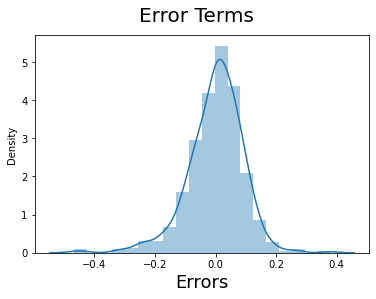

In [104]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 5.3 Making Predictions

### Applying the scaling on the test sets

In [105]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [106]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [107]:
X_train_new = X_train_rfe5.drop(['const'], axis=1)

In [108]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [109]:
#Making predictions on the chosen model

y_pred = lm5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

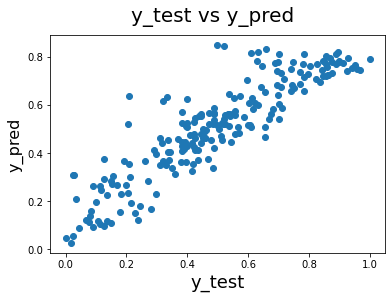

In [110]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [112]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11257253110033383

In [113]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7931386722141643

In [114]:
#R square of our model is 79.3

In [115]:
X_t=X_train_new.iloc[:,0].values

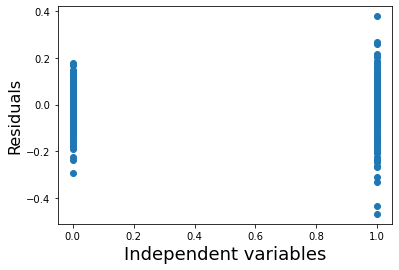

In [116]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [117]:
X_train_new.head()

,yr,atemp,windspeed,spring,winter,dec,nov,sept,cloudy,light snow + rain
183,0,0.823608,0.397036,0,0,0,0,0,1,0
1,0,0.383745,0.439630,1,0,0,0,0,1,0
168,0,0.789210,0.160161,0,0,0,0,0,0,0
574,1,0.822711,0.270511,0,0,0,0,0,0,0
535,1,0.896817,0.148050,0,0,0,0,0,0,0


In [121]:
print(X_train_rfe5.columns)
print(lm5.summary())

Index(['const', 'yr', 'atemp', 'windspeed', 'spring', 'winter', 'dec', 'nov',
       'sept', 'cloudy', 'light snow + rain'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.91e-188
Time:                        21:21:48   Log-Likelihood:                 501.99
No. Observations:                 518   AIC:                            -982.0
Df Residuals:                     507   BIC:                            -935.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|  

#### We can see that the equation of our best fitted line is:

### cnt = 0.23 x yr + 0.38 x atemp - 0.12 x windspeed - 0.13 x spring + 0.06 x winter - 0.05 x dec - 0.07 x nov + 0.04 x sept - 0.07 x cloudy - 0.26 x (light snow + rain)

### We can see the demand for bikes depends mainly on below variables:
- yr
- atemp
- windspeed
- spring
- winter
- dec
- nov
- sept
- cloudy
- light snow + rain